In [66]:
import numpy as np
from matplotlib import pyplot as plt

In [67]:
P1 = np.array([[1, 0, 0, 0, 0],
               [0, 0, 0.5, 0.5, 0],
               [0, 0.5, 0, 0, 0.5],
               [0, 0.5, 0, 0, 0.5],
               [1/3, 0, 1/3, 1/3, 0]])

P1 @ P1

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.5       ],
       [0.16666667, 0.        , 0.41666667, 0.41666667, 0.        ],
       [0.16666667, 0.        , 0.41666667, 0.41666667, 0.        ],
       [0.33333333, 0.33333333, 0.        , 0.        , 0.33333333]])

In [68]:
5 / 12

0.4166666666666667

In [69]:
P4 = np.array([[0.6, 0.3, 0.1],
               [0.2, 0.5, 0.3],
               [0.4, 0.4, 0.2]])

P4 @ P4

array([[0.46, 0.37, 0.17],
       [0.34, 0.43, 0.23],
       [0.4 , 0.4 , 0.2 ]])

In [70]:
def randomDrunkWalk(tmax):
    dirDist = [1/4, 1/4, 1/4, 1/4]
    dirRange = np.cumsum(dirDist)    
    dirVec = {
        0: np.array([1, 0]),
        1: np.array([-1, 0]),
        2: np.array([0, -1]),
        3: np.array([0, 1]),
    }

    ab = np.array([0,0])
    c = np.array([0,0])
    for i in range(tmax):
        u = np.random.rand(3)
        dirs = np.argmax(u  <= np.expand_dims(dirRange, 1), axis=0)        
        
        if dirs[0] == dirs[1]:            
            dirAB = dirVec[dirs[0]]
            ab += dirAB
                    
        c += dirVec[dirs[2]]

    return ab, c

In [71]:
n = 500
distAB = []
distC = []

for i in range(n):
    ab, c = randomDrunkWalk(60 * 60)
    distAB.append(np.linalg.norm(ab))
    distC.append(np.linalg.norm(c))

(array([ 44.,  90.,  90., 105.,  78.,  47.,  23.,  17.,   4.,   2.]),
 array([ 2.23606798,  9.35003571, 16.46400344, 23.57797118, 30.69193891,
        37.80590664, 44.91987438, 52.03384211, 59.14780984, 66.26177758,
        73.37574531]),
 <BarContainer object of 10 artists>)

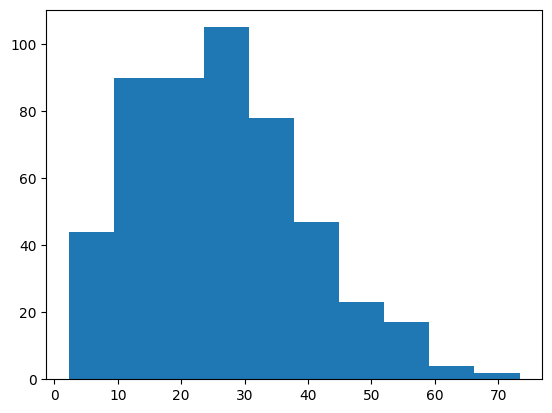

In [72]:
plt.hist(distAB)

(array([ 31., 116., 124., 109.,  69.,  28.,  12.,   7.,   3.,   1.]),
 array([  1.41421356,  18.58694826,  35.75968297,  52.93241767,
         70.10515237,  87.27788707, 104.45062177, 121.62335647,
        138.79609118, 155.96882588, 173.14156058]),
 <BarContainer object of 10 artists>)

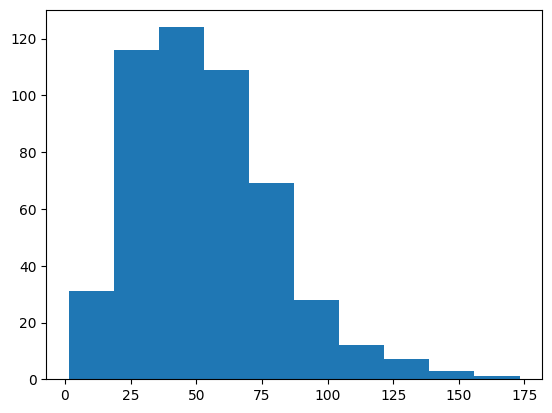

In [73]:
plt.hist(distC)

In [74]:
np.savetxt("distAB.csv", np.array(distAB), fmt='%1.5f')
np.savetxt("distC.csv", np.array(distC), fmt='%1.5f')

In [75]:
np.quantile(distAB, 0.6)

28.375962286813717

In [76]:
np.quantile(distC, 0.6)

57.82369131100841